In [2]:
from skimage.feature import blob_log
from skimage import io
from skimage.filters import gaussian
import numpy as np

img = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')
if len(img.shape) == 3:
    img = img[..., 0]

# Blur + blob detect
blobs = blob_log(gaussian(img, 2), min_sigma=5, max_sigma=20, threshold=0.02)
print(f"Found {len(blobs)} nuclei")

Found 7 nuclei


Loading image...
Original shape: (4713, 3817, 3)
Original dtype: uint8

Channel statistics:
  Channel 0: min=0, max=255, mean=0.04
  Channel 1: min=0, max=255, mean=0.04
  Channel 2: min=0, max=255, mean=68.61

Saved all_channels.png - check which channel has data!


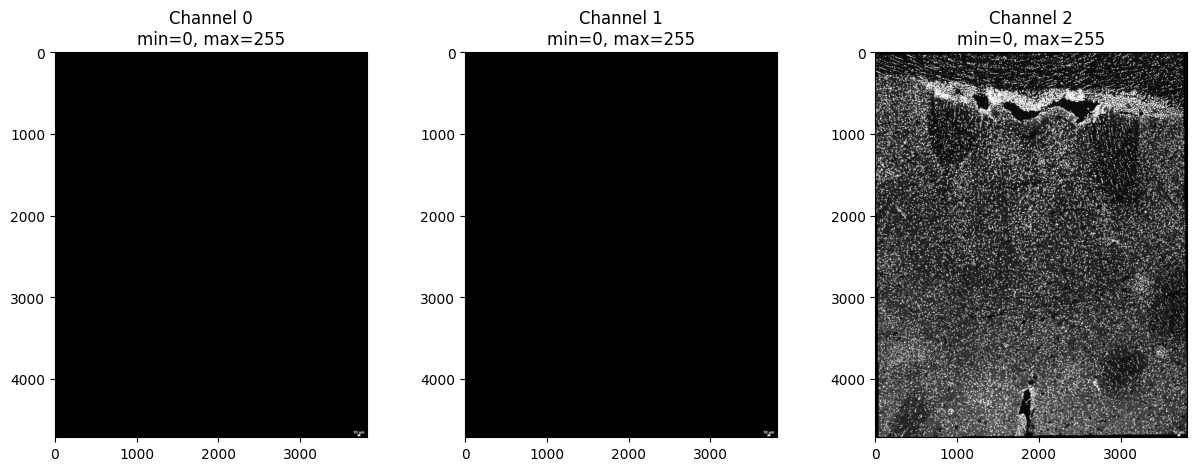


Best channel appears to be: 0

Final DAPI shape: (4713, 3817)
Final DAPI range: 0 - 255
Saved dapi_contrast_tests.png


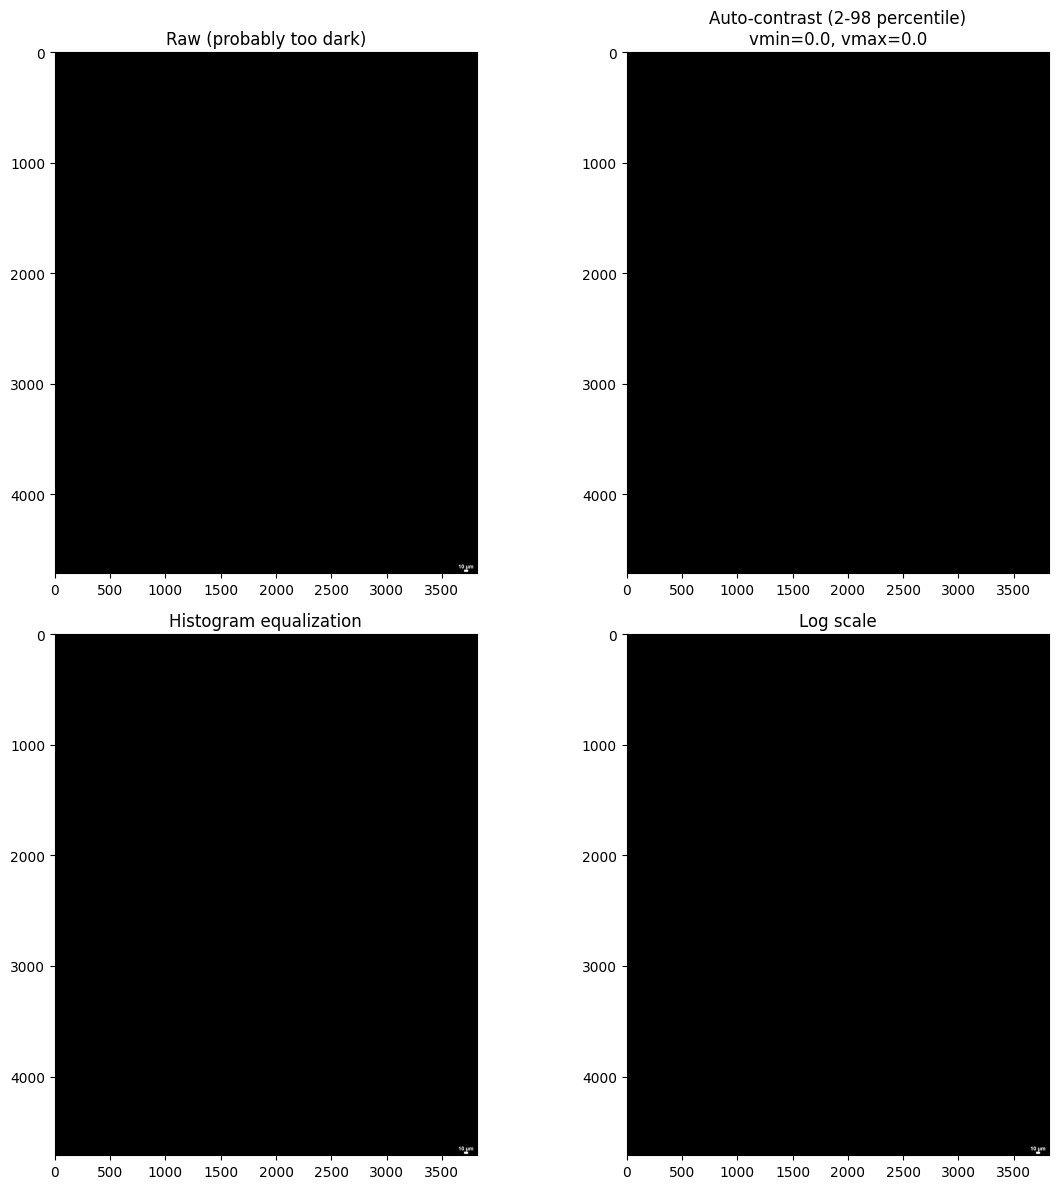

Saved dapi_histogram.png


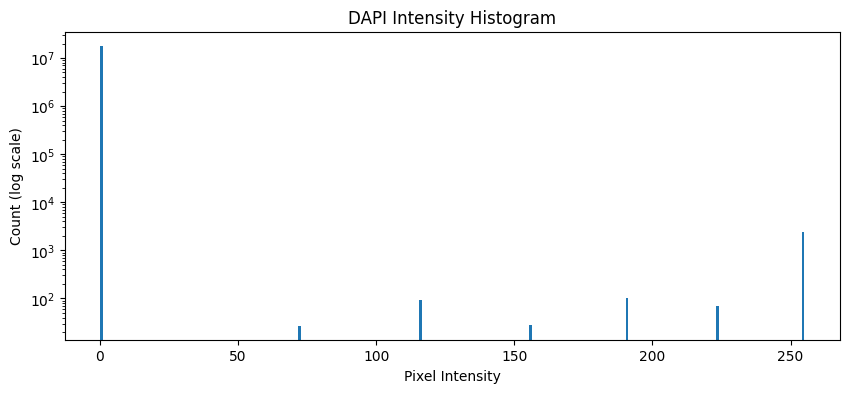


DIAGNOSIS:
⚠️  Very low contrast (range: 0.0 to 0.0)
   → Image has very narrow dynamic range


In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load the original RGB image
print("Loading image...")
dapi_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')
print(f"Original shape: {dapi_rgb.shape}")
print(f"Original dtype: {dapi_rgb.dtype}")

# Check all 3 channels
if len(dapi_rgb.shape) == 3:
    print("\nChannel statistics:")
    for i in range(3):
        channel = dapi_rgb[..., i]
        print(f"  Channel {i}: min={channel.min()}, max={channel.max()}, mean={channel.mean():.2f}")
    
    # Show all 3 channels
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axes[i].imshow(dapi_rgb[..., i], cmap='gray')
        axes[i].set_title(f'Channel {i}\nmin={dapi_rgb[..., i].min()}, max={dapi_rgb[..., i].max()}')
    plt.savefig('all_channels.png', dpi=150)
    print("\nSaved all_channels.png - check which channel has data!")
    plt.show()
    
    # Take the channel with highest max value (likely has signal)
    max_vals = [dapi_rgb[..., i].max() for i in range(3)]
    best_channel = np.argmax(max_vals)
    print(f"\nBest channel appears to be: {best_channel}")
    
    dapi = dapi_rgb[..., best_channel]
else:
    dapi = dapi_rgb

print(f"\nFinal DAPI shape: {dapi.shape}")
print(f"Final DAPI range: {dapi.min()} - {dapi.max()}")

# Show with proper contrast adjustment
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 1. Raw (will look dark)
axes[0, 0].imshow(dapi, cmap='gray')
axes[0, 0].set_title('Raw (probably too dark)')

# 2. Auto-contrast (percentile-based)
p2, p98 = np.percentile(dapi, (2, 98))
axes[0, 1].imshow(dapi, cmap='gray', vmin=p2, vmax=p98)
axes[0, 1].set_title(f'Auto-contrast (2-98 percentile)\nvmin={p2:.1f}, vmax={p98:.1f}')

# 3. Histogram equalization
from skimage import exposure
dapi_eq = exposure.equalize_adapthist(dapi)
axes[1, 0].imshow(dapi_eq, cmap='gray')
axes[1, 0].set_title('Histogram equalization')

# 4. Log scale
dapi_log = np.log1p(dapi)
axes[1, 1].imshow(dapi_log, cmap='gray')
axes[1, 1].set_title('Log scale')

plt.tight_layout()
plt.savefig('dapi_contrast_tests.png', dpi=150)
print("Saved dapi_contrast_tests.png")
plt.show()

# Show histogram
plt.figure(figsize=(10, 4))
plt.hist(dapi.ravel(), bins=256, log=True)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count (log scale)')
plt.title('DAPI Intensity Histogram')
plt.savefig('dapi_histogram.png', dpi=150)
print("Saved dapi_histogram.png")
plt.show()

print("\n" + "="*60)
print("DIAGNOSIS:")
print("="*60)
if dapi.max() == 0:
    print("❌ Image is completely black - no signal!")
    print("   → Wrong file or corrupted data")
elif dapi.max() < 10:
    print("⚠️  Very low signal (max={})".format(dapi.max()))
    print("   → Image is very dim, needs strong contrast adjustment")
elif p98 - p2 < 10:
    print("⚠️  Very low contrast (range: {} to {})".format(p2, p98))
    print("   → Image has very narrow dynamic range")
else:
    print("✓ Image has signal! (range: {} to {})".format(dapi.min(), dapi.max()))
    print("  → Just needs contrast adjustment for display")
print("="*60)

Checking all files...


DAPI (ch00): PVN, MD, RE image61_R 91_Merged_ch00_SV.tif
  Shape: (4713, 3817, 3)
    RGB channel 0: min=0, max=255, mean=0.04
      ✓ HAS DATA
    RGB channel 1: min=0, max=255, mean=0.04
      ✓ HAS DATA
    RGB channel 2: min=0, max=255, mean=68.61
      ✓ HAS DATA

TH (ch01): PVN, MD, RE image61_R 91_Merged_ch01_SV.tif
  Shape: (4713, 3817, 3)
    RGB channel 0: min=0, max=255, mean=0.04
      ✓ HAS DATA
    RGB channel 1: min=0, max=255, mean=47.28
      ✓ HAS DATA
    RGB channel 2: min=0, max=255, mean=0.04
      ✓ HAS DATA

Oxy (ch02): PVN, MD, RE image61_R 91_Merged_ch02_SV.tif
  Shape: (4713, 3817, 3)
    RGB channel 0: min=0, max=255, mean=38.38
      ✓ HAS DATA
    RGB channel 1: min=0, max=255, mean=0.04
      ✓ HAS DATA
    RGB channel 2: min=0, max=255, mean=0.04
      ✓ HAS DATA

cFos (ch03): PVN, MD, RE image61_R 91_Merged_ch03_SV.tif
  Shape: (4713, 3817, 3)
    RGB channel 0: min=0, max=255, mean=38.72
      ✓ HAS DATA
    RGB channel 1: min=0

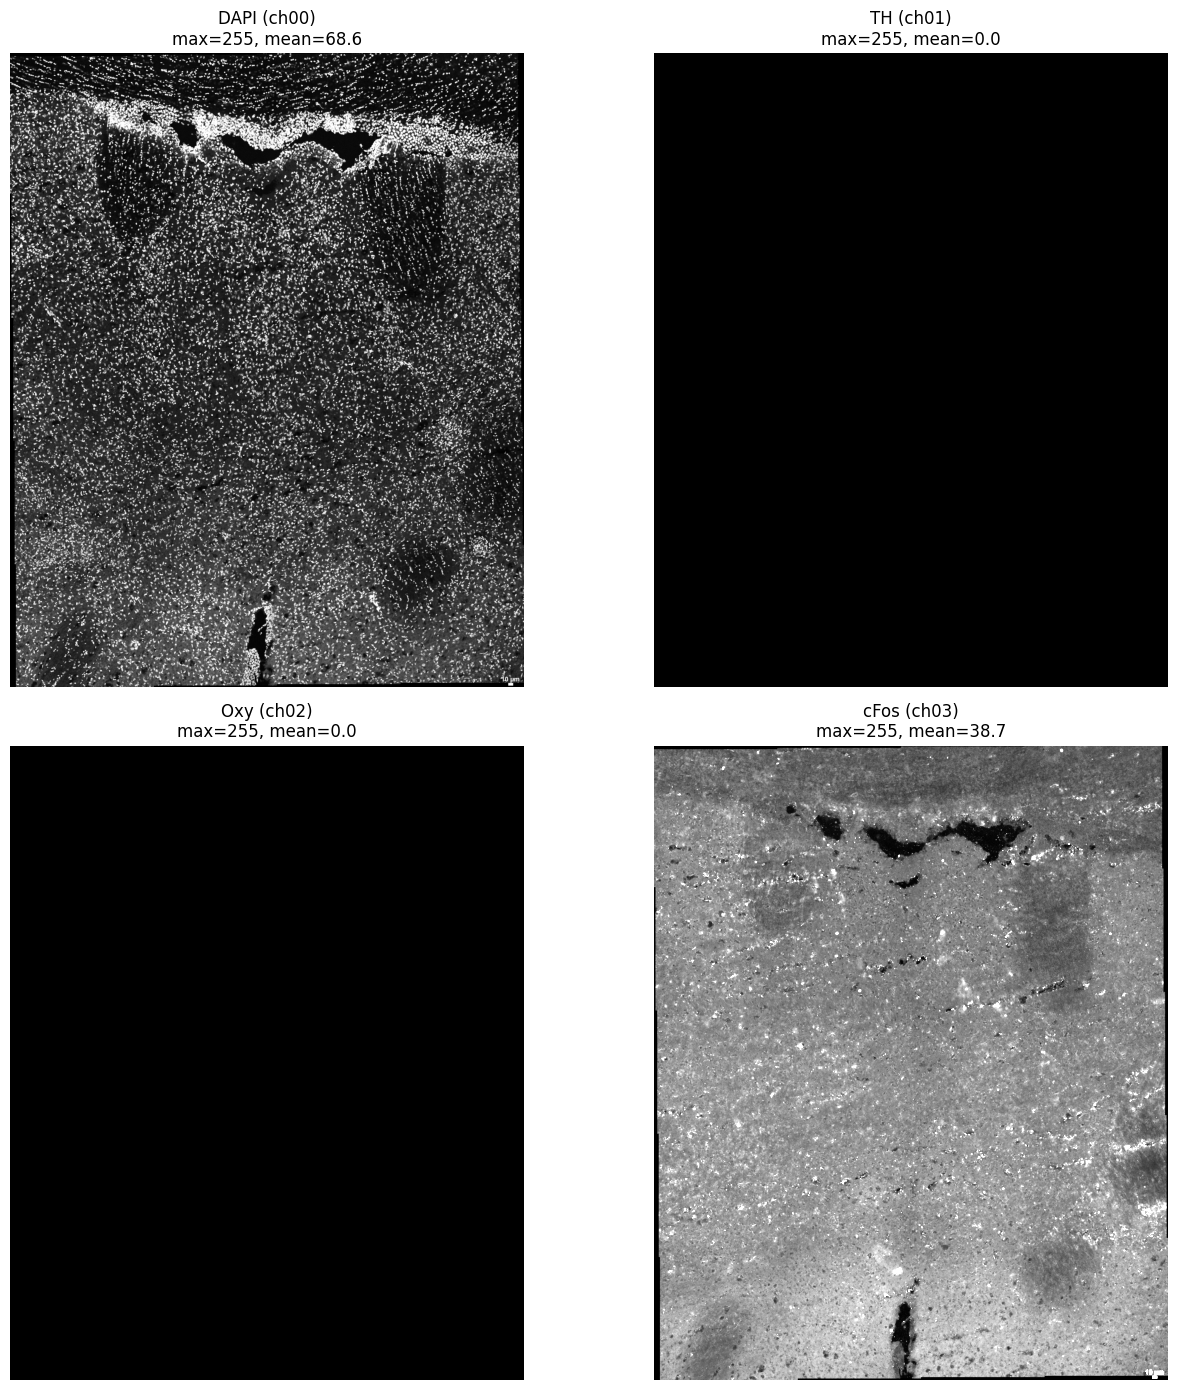

In [4]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

files = [
    'PVN, MD, RE image61_R 91_Merged_ch00_SV.tif',  # DAPI
    'PVN, MD, RE image61_R 91_Merged_ch01_SV.tif',  # TH
    'PVN, MD, RE image61_R 91_Merged_ch02_SV.tif',  # Oxy
    'PVN, MD, RE image61_R 91_Merged_ch03_SV.tif',  # cFos
]

labels = ['DAPI (ch00)', 'TH (ch01)', 'Oxy (ch02)', 'cFos (ch03)']

print("Checking all files...\n")
print("="*60)

channel_map = {}

for file, label in zip(files, labels):
    print(f"\n{label}: {file}")
    img = io.imread(file)
    print(f"  Shape: {img.shape}")
    
    if len(img.shape) == 3:
        for i in range(3):
            ch = img[..., i]
            print(f"    RGB channel {i}: min={ch.min()}, max={ch.max()}, mean={ch.mean():.2f}")
            if ch.max() > 10:  # Has signal
                print(f"      ✓ HAS DATA")
                channel_map[label] = i
    else:
        print(f"  Grayscale: min={img.min()}, max={img.max()}, mean={img.mean():.2f}")
        channel_map[label] = None

print("\n" + "="*60)
print("SUMMARY:")
print("="*60)
for label, ch in channel_map.items():
    if ch is not None:
        print(f"{label:20s} → Use RGB channel {ch}")
    else:
        print(f"{label:20s} → Already grayscale")

# Now load correctly and visualize
print("\n" + "="*60)
print("Loading with correct channels...")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

for idx, (file, label) in enumerate(zip(files, labels)):
    img = io.imread(file)
    
    # Extract correct channel
    if label in channel_map and channel_map[label] is not None:
        img_gray = img[..., channel_map[label]]
    else:
        img_gray = img
    
    # Auto-contrast
    p2, p98 = np.percentile(img_gray, (2, 98))
    
    ax = axes[idx // 2, idx % 2]
    ax.imshow(img_gray, cmap='gray', vmin=p2, vmax=p98)
    ax.set_title(f'{label}\nmax={img_gray.max()}, mean={img_gray.mean():.1f}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('all_4_channels_correct.png', dpi=150)
print("\nSaved visualization to: all_4_channels_correct.png")
plt.show()

DAPI: PVN, MD, RE image61_R 91_Merged_ch00_SV.tif
Shape: (4713, 3817, 3), dtype: uint8

RGB Channel 0:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.03
  Non-zero pixels: 2716/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

RGB Channel 1:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.02
  Non-zero pixels: 2798/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

RGB Channel 2:
  Min: 0
  Max: 255
  Mean: 68.61
  Std: 66.41
  Non-zero pixels: 17659618/17989521 (98.17%)
  Brightest pixel: value=255 at location (np.int64(0), np.int64(3756))

Saved DAPI_detailed_analysis.png



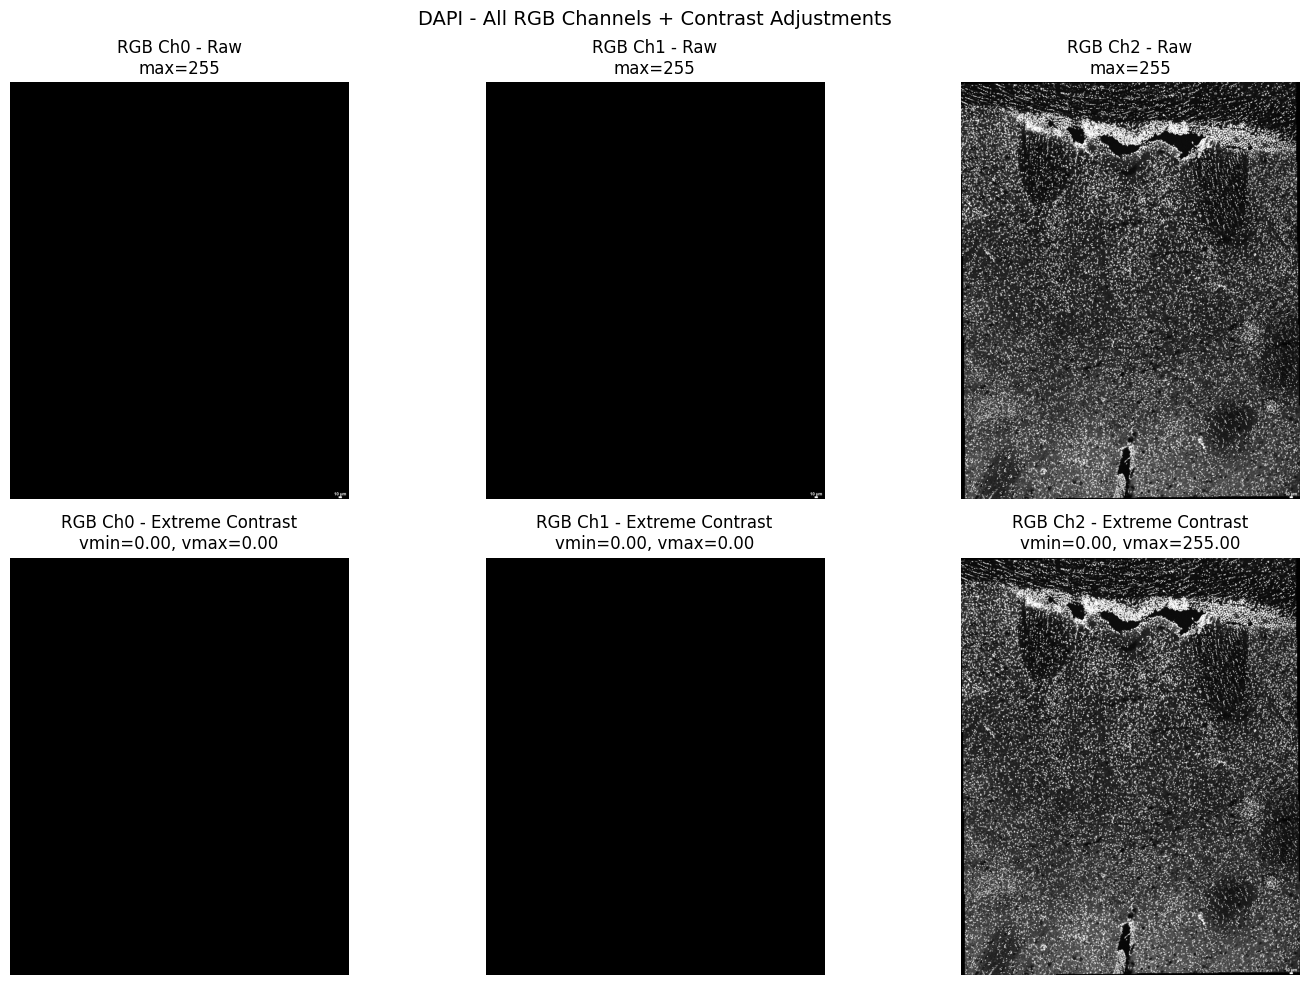

Saved DAPI_histograms.png



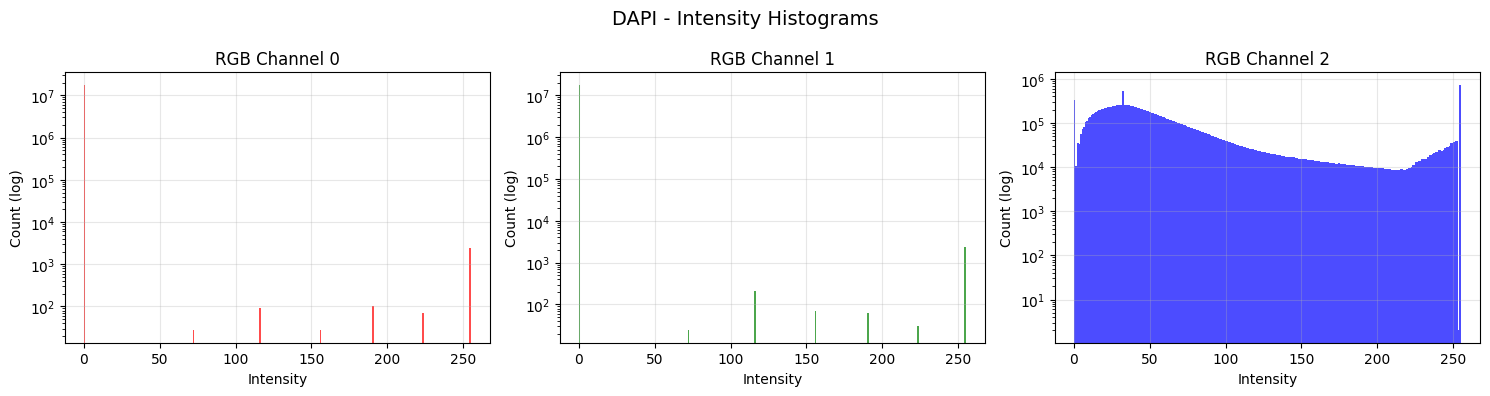

TH: PVN, MD, RE image61_R 91_Merged_ch01_SV.tif
Shape: (4713, 3817, 3), dtype: uint8

RGB Channel 0:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.03
  Non-zero pixels: 2716/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

RGB Channel 1:
  Min: 0
  Max: 255
  Mean: 47.28
  Std: 20.02
  Non-zero pixels: 17664872/17989521 (98.20%)
  Brightest pixel: value=255 at location (np.int64(296), np.int64(2998))

RGB Channel 2:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.03
  Non-zero pixels: 2740/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

Saved TH_detailed_analysis.png



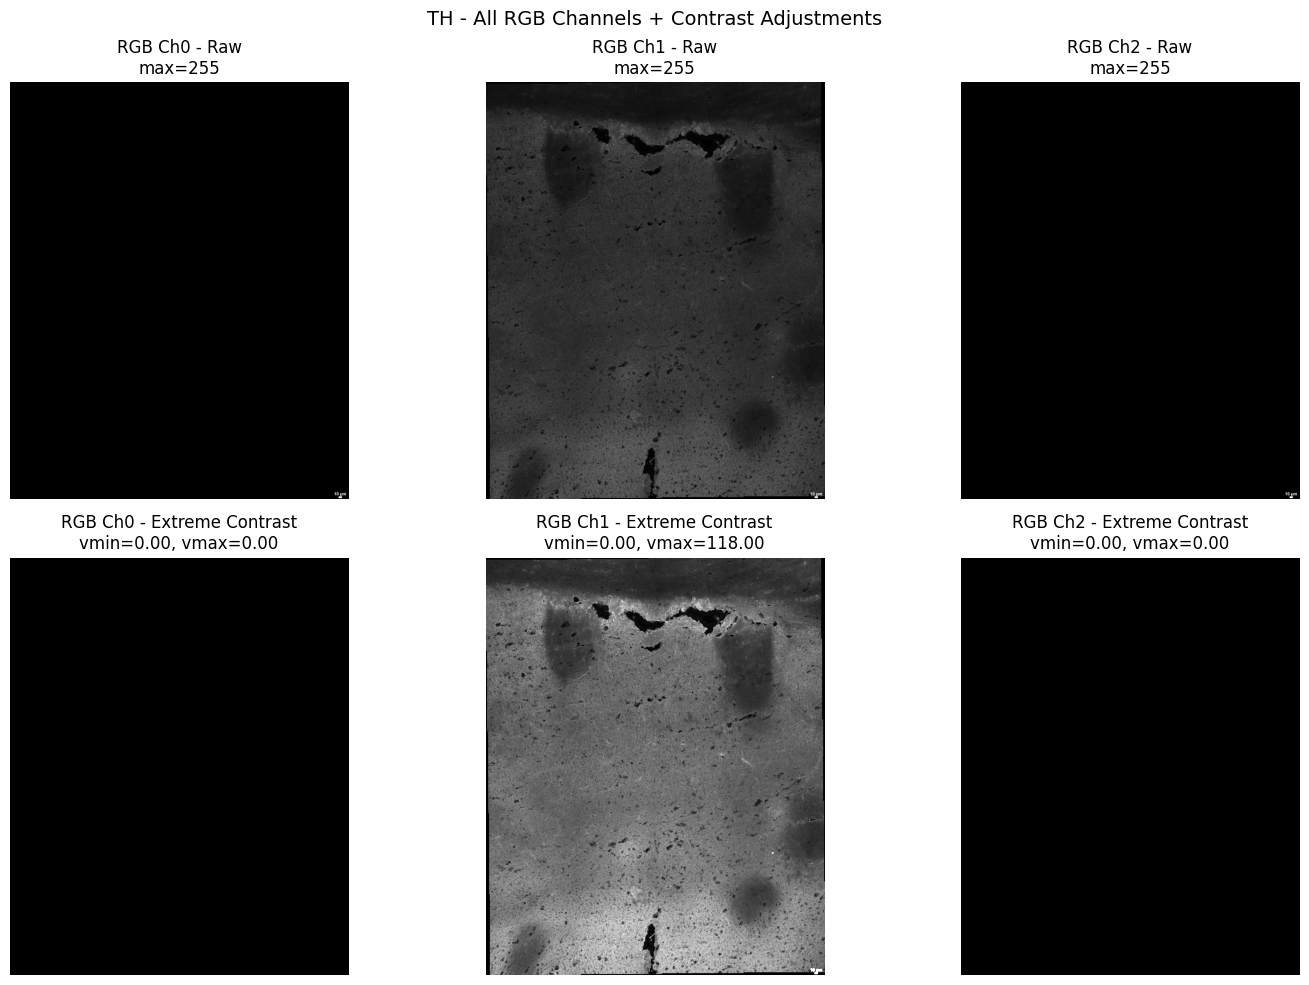

Saved TH_histograms.png



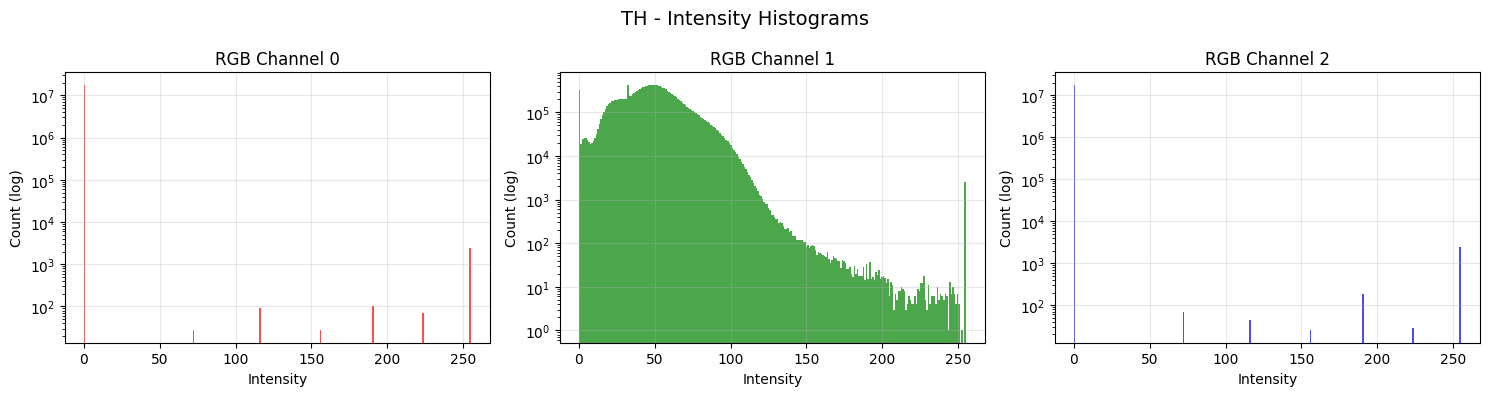

Oxy: PVN, MD, RE image61_R 91_Merged_ch02_SV.tif
Shape: (4713, 3817, 3), dtype: uint8

RGB Channel 0:
  Min: 0
  Max: 255
  Mean: 38.38
  Std: 16.08
  Non-zero pixels: 17662999/17989521 (98.18%)
  Brightest pixel: value=255 at location (np.int64(186), np.int64(3261))

RGB Channel 1:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.02
  Non-zero pixels: 2798/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

RGB Channel 2:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.03
  Non-zero pixels: 2740/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

Saved Oxy_detailed_analysis.png



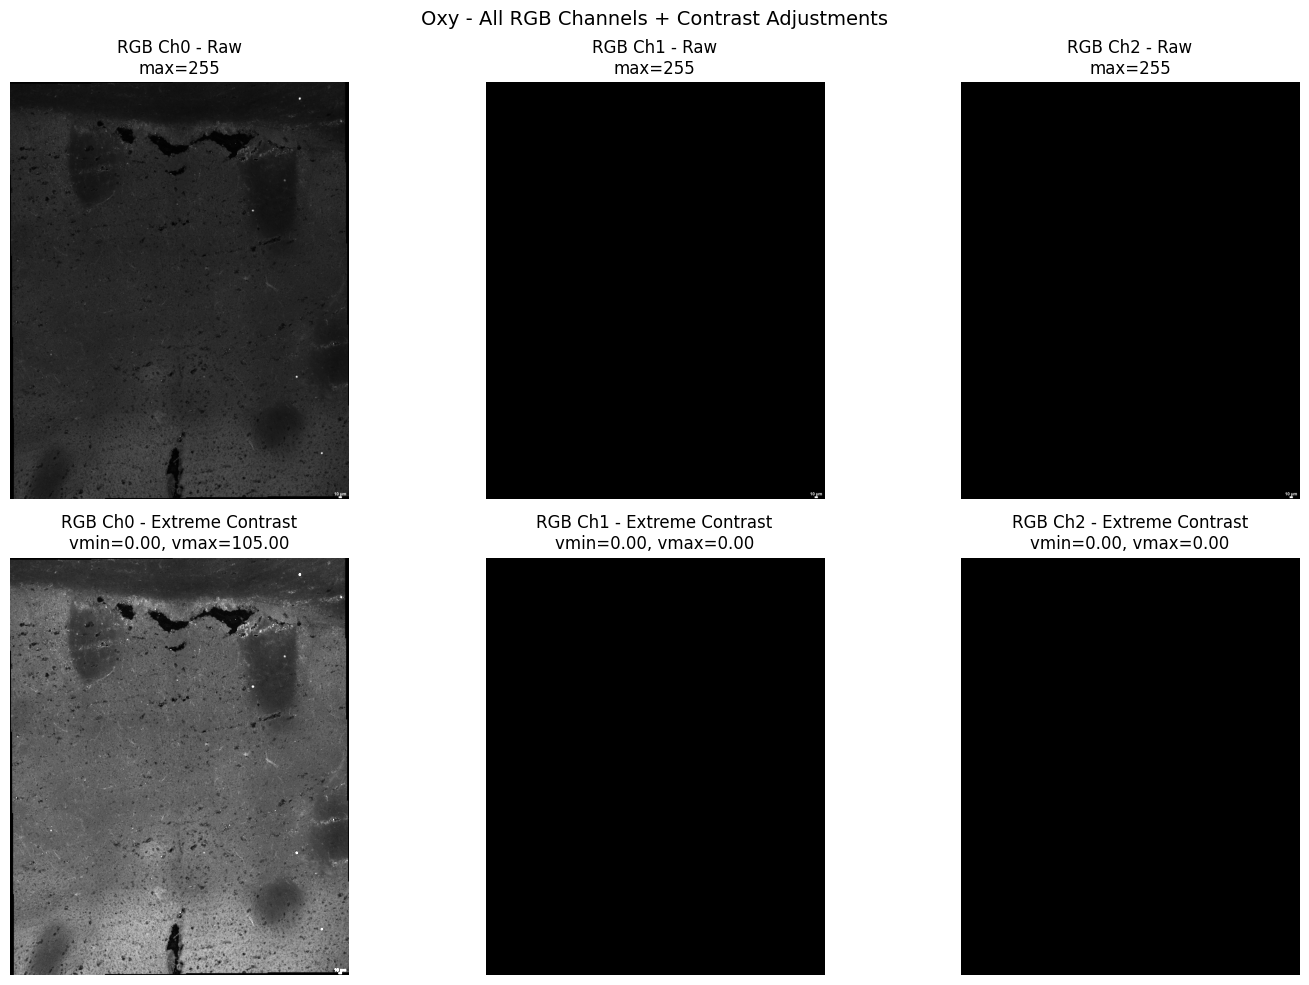

Saved Oxy_histograms.png



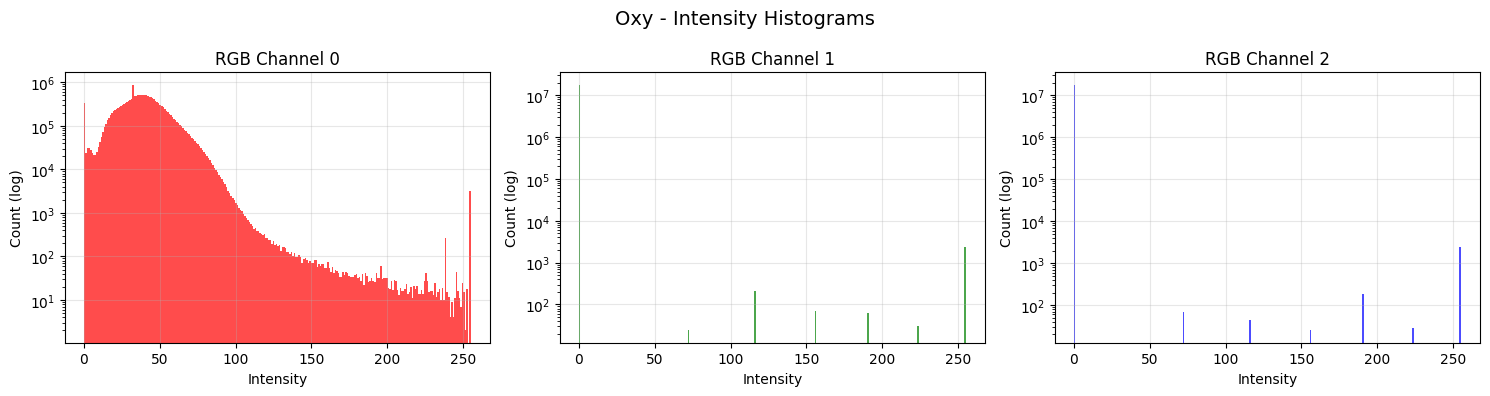

cFos: PVN, MD, RE image61_R 91_Merged_ch03_SV.tif
Shape: (4713, 3817, 3), dtype: uint8

RGB Channel 0:
  Min: 0
  Max: 255
  Mean: 38.72
  Std: 14.00
  Non-zero pixels: 17671433/17989521 (98.23%)
  Brightest pixel: value=255 at location (np.int64(192), np.int64(2539))

RGB Channel 1:
  Min: 0
  Max: 255
  Mean: 0.04
  Std: 3.02
  Non-zero pixels: 2798/17989521 (0.02%)
  Brightest pixel: value=255 at location (np.int64(4637), np.int64(3662))

RGB Channel 2:
  Min: 0
  Max: 255
  Mean: 38.72
  Std: 14.00
  Non-zero pixels: 17671433/17989521 (98.23%)
  Brightest pixel: value=255 at location (np.int64(192), np.int64(2539))

Saved cFos_detailed_analysis.png



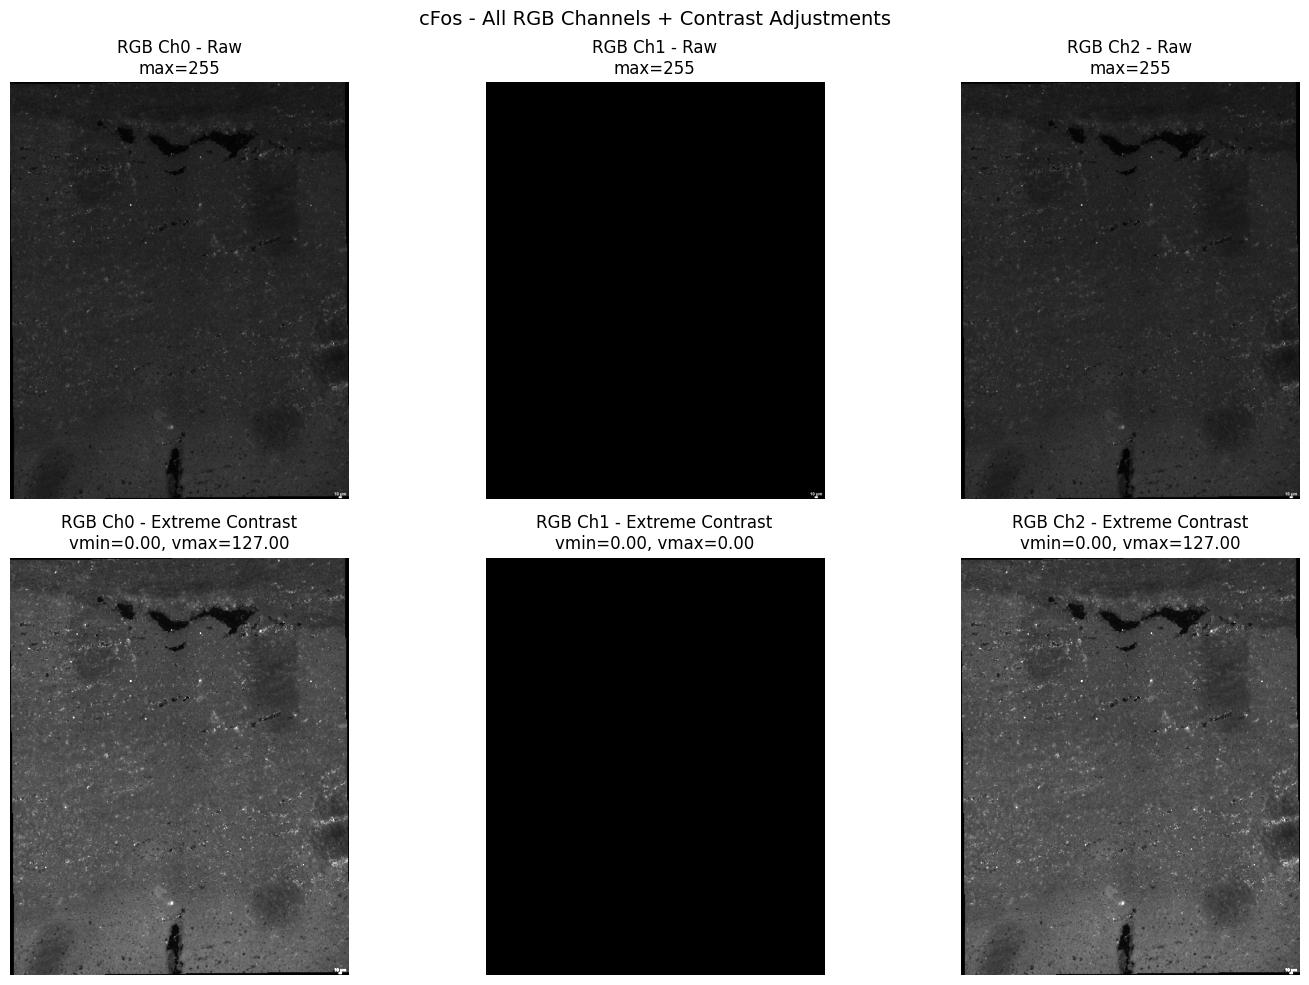

Saved cFos_histograms.png



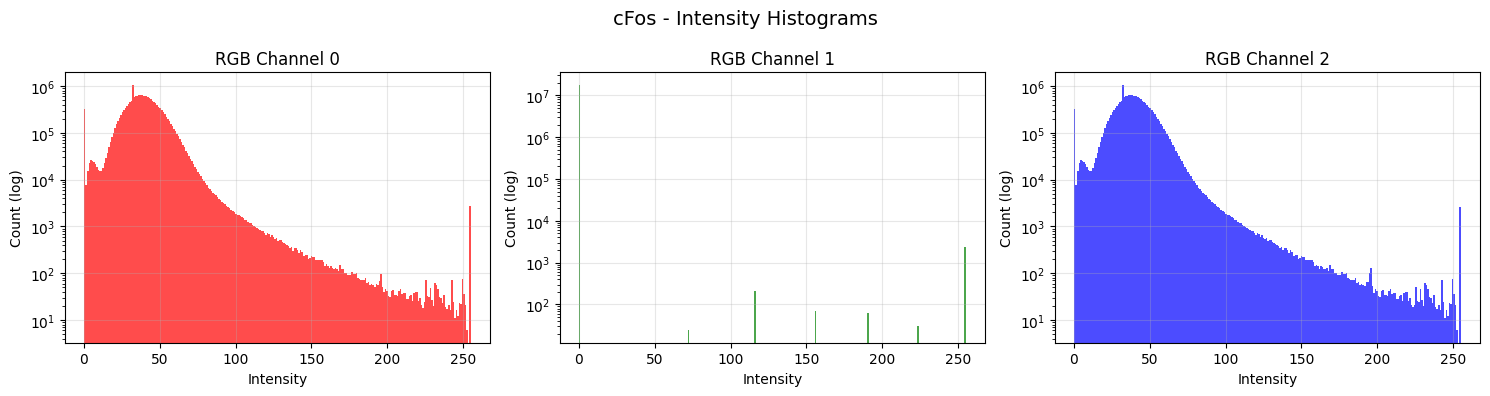

ANALYSIS COMPLETE


In [6]:
from skimage import io, exposure
import matplotlib.pyplot as plt
import numpy as np

files = [
    ('DAPI', 'PVN, MD, RE image61_R 91_Merged_ch00_SV.tif'),
    ('TH', 'PVN, MD, RE image61_R 91_Merged_ch01_SV.tif'),
    ('Oxy', 'PVN, MD, RE image61_R 91_Merged_ch02_SV.tif'),
    ('cFos', 'PVN, MD, RE image61_R 91_Merged_ch03_SV.tif'),
]

for name, file in files:
    print("="*60)
    print(f"{name}: {file}")
    print("="*60)
    
    img = io.imread(file)
    print(f"Shape: {img.shape}, dtype: {img.dtype}\n")
    
    # Check each RGB channel
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'{name} - All RGB Channels + Contrast Adjustments', fontsize=14)
    
    for i in range(3):
        ch = img[..., i]
        
        print(f"RGB Channel {i}:")
        print(f"  Min: {ch.min()}")
        print(f"  Max: {ch.max()}")
        print(f"  Mean: {ch.mean():.2f}")
        print(f"  Std: {ch.std():.2f}")
        
        # Count non-zero pixels
        nonzero = np.count_nonzero(ch)
        total = ch.size
        print(f"  Non-zero pixels: {nonzero}/{total} ({nonzero/total*100:.2f}%)")
        
        # Find brightest region
        if ch.max() > 0:
            brightest_val = ch.max()
            brightest_loc = np.unravel_index(ch.argmax(), ch.shape)
            print(f"  Brightest pixel: value={brightest_val} at location {brightest_loc}")
        
        print()
        
        # Raw display
        axes[0, i].imshow(ch, cmap='gray')
        axes[0, i].set_title(f'RGB Ch{i} - Raw\nmax={ch.max()}')
        axes[0, i].axis('off')
        
        # Extreme contrast stretch
        if ch.max() > ch.min():
            p0_1, p99_9 = np.percentile(ch, (0.1, 99.9))
            axes[1, i].imshow(ch, cmap='gray', vmin=p0_1, vmax=p99_9)
            axes[1, i].set_title(f'RGB Ch{i} - Extreme Contrast\nvmin={p0_1:.2f}, vmax={p99_9:.2f}')
        else:
            axes[1, i].imshow(ch, cmap='gray')
            axes[1, i].set_title(f'RGB Ch{i} - All same value')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'{name}_detailed_analysis.png', dpi=150)
    print(f"Saved {name}_detailed_analysis.png\n")
    plt.show()
    
    # Histogram
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f'{name} - Intensity Histograms', fontsize=14)
    
    for i in range(3):
        ch = img[..., i]
        axes[i].hist(ch.ravel(), bins=256, log=True, color=['red', 'green', 'blue'][i], alpha=0.7)
        axes[i].set_xlabel('Intensity')
        axes[i].set_ylabel('Count (log)')
        axes[i].set_title(f'RGB Channel {i}')
        axes[i].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{name}_histograms.png', dpi=150)
    print(f"Saved {name}_histograms.png\n")
    plt.show()

print("="*60)
print("ANALYSIS COMPLETE")
print("="*60)


In [8]:
import torch
from cellpose import models
import numpy as np

print("="*60)
print("CELLPOSE GPU CHECK")
print("="*60)

# Check PyTorch (what Cellpose actually uses)
print("\nPyTorch GPU Status:")
print(f"  CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"  ✓ GPU detected!")
    print(f"  Device name: {torch.cuda.get_device_name(0)}")
    print(f"  Device count: {torch.cuda.device_count()}")
    
    # Test Cellpose with GPU
    print("\nTesting Cellpose with GPU...")
    try:
        model = models.CellposeModel(gpu=True, model_type='nuclei')
        test_img = np.random.randint(0, 255, (500, 500), dtype=np.uint8)
        masks = model.eval(test_img, diameter=30, channels=[0,0])[0]
        print("  ✓ Cellpose GPU works!")
        print("\n→ USE: gpu=True for 10-20x speedup")
    except Exception as e:
        print(f"  ❌ Cellpose GPU failed: {e}")
        print("\n→ USE: gpu=False (CPU mode)")
else:
    print("  ❌ No CUDA GPU detected")
    print("\n→ USE: gpu=False (CPU mode)")

print("="*60)

model_type argument is not used in v4.0.1+. Ignoring this argument...


CELLPOSE GPU CHECK

PyTorch GPU Status:
  CUDA available: True
  ✓ GPU detected!
  Device name: NVIDIA GeForce RTX 4090
  Device count: 2

Testing Cellpose with GPU...


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


  ✓ Cellpose GPU works!

→ USE: gpu=True for 10-20x speedup


In [9]:
import torch; print(f"GPU: {torch.cuda.is_available()}")

GPU: True


In [11]:
import pandas as pd
df = pd.read_csv('pvn_analysis.csv')

# Show some example positive and negative cells
print("Example TH+ cells:")
print(df[df['TH_positive']].head()[['cell_id', 'TH_mean', 'TH_max']])

print("\nExample TH- cells:")
print(df[~df['TH_positive']].head()[['cell_id', 'TH_mean', 'TH_max']])

# Look at colocalization
print("\nColocalization:")
print(f"TH+/cFos+: {(df['TH_positive'] & df['cFos_positive']).sum()}")
print(f"Oxy+/cFos+: {(df['Oxy_positive'] & df['cFos_positive']).sum()}")
print(f"TH+/Oxy+: {(df['TH_positive'] & df['Oxy_positive']).sum()}")

Example TH+ cells:
      cell_id    TH_mean  TH_max
221       222  48.835196     212
1924     1925  53.983368     107
1969     1970  50.073864     100
1986     1987  50.048443      92
1990     1991  52.408602      79

Example TH- cells:
   cell_id    TH_mean  TH_max
0        1  17.851240      31
1        2  25.223140      59
2        3  23.277551      52
3        4  24.355932      38
4        5  26.224670      53

Colocalization:
TH+/cFos+: 8935
Oxy+/cFos+: 9922
TH+/Oxy+: 10216


Cell Area Statistics:
  Mean: 246.1 pixels
  Median: 220.0 pixels
  Min: 15.0 pixels
  Max: 1081.0 pixels
  25th percentile: 165.0
  75th percentile: 304.0


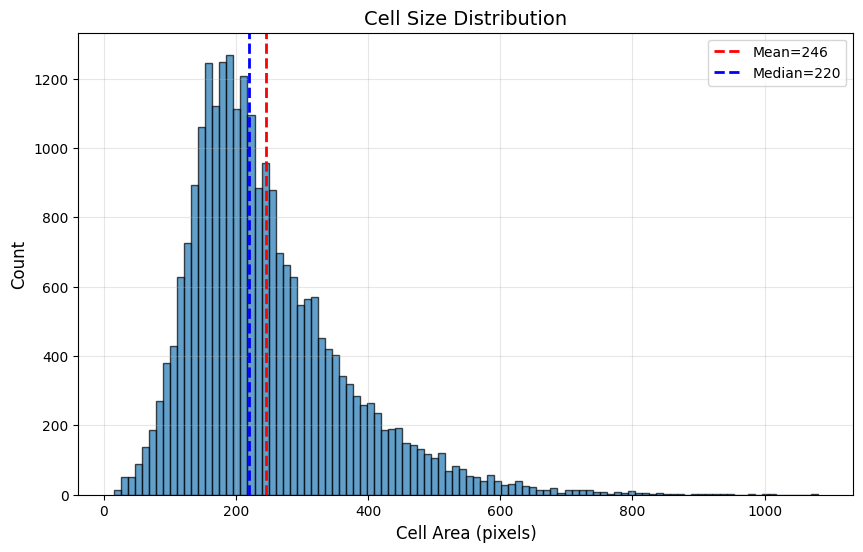


Estimated average cell diameter: 16.7 pixels

Suspiciously large cells (>95th percentile, >475 pixels): 1236
These might be merged cells or debris


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pvn_cell_analysis.csv')

# Cell size statistics
print("Cell Area Statistics:")
print(f"  Mean: {df['area'].mean():.1f} pixels")
print(f"  Median: {df['area'].median():.1f} pixels")
print(f"  Min: {df['area'].min():.1f} pixels")
print(f"  Max: {df['area'].max():.1f} pixels")
print(f"  25th percentile: {df['area'].quantile(0.25):.1f}")
print(f"  75th percentile: {df['area'].quantile(0.75):.1f}")

# Histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(df['area'], bins=100, edgecolor='black', alpha=0.7)
ax.axvline(df['area'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean={df["area"].mean():.0f}')
ax.axvline(df['area'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median={df["area"].median():.0f}')
ax.set_xlabel('Cell Area (pixels)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Cell Size Distribution', fontsize=14)
ax.legend()
ax.grid(alpha=0.3)
plt.savefig('cell_size_distribution.png', dpi=150)
plt.show()

# Estimate cell diameter
avg_diameter = 2 * np.sqrt(df['area'].median() / np.pi)
print(f"\nEstimated average cell diameter: {avg_diameter:.1f} pixels")

# Flag suspiciously large cells (possible merges)
large_threshold = df['area'].quantile(0.95)
large_cells = df[df['area'] > large_threshold]
print(f"\nSuspiciously large cells (>95th percentile, >{large_threshold:.0f} pixels): {len(large_cells)}")
print(f"These might be merged cells or debris")


model_type argument is not used in v4.0.1+. Ignoring this argument...


DAPI shape: (4713, 3817)
DAPI range: 0 - 255


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used



Mask shape: (4713, 3817)
Mask dtype: uint16
Unique labels: 24713 (including background)
Max label: 24712

Cell size stats (pixels):
  Min: 15
  Max: 1081
  Mean: 246.1
  Median: 220.0


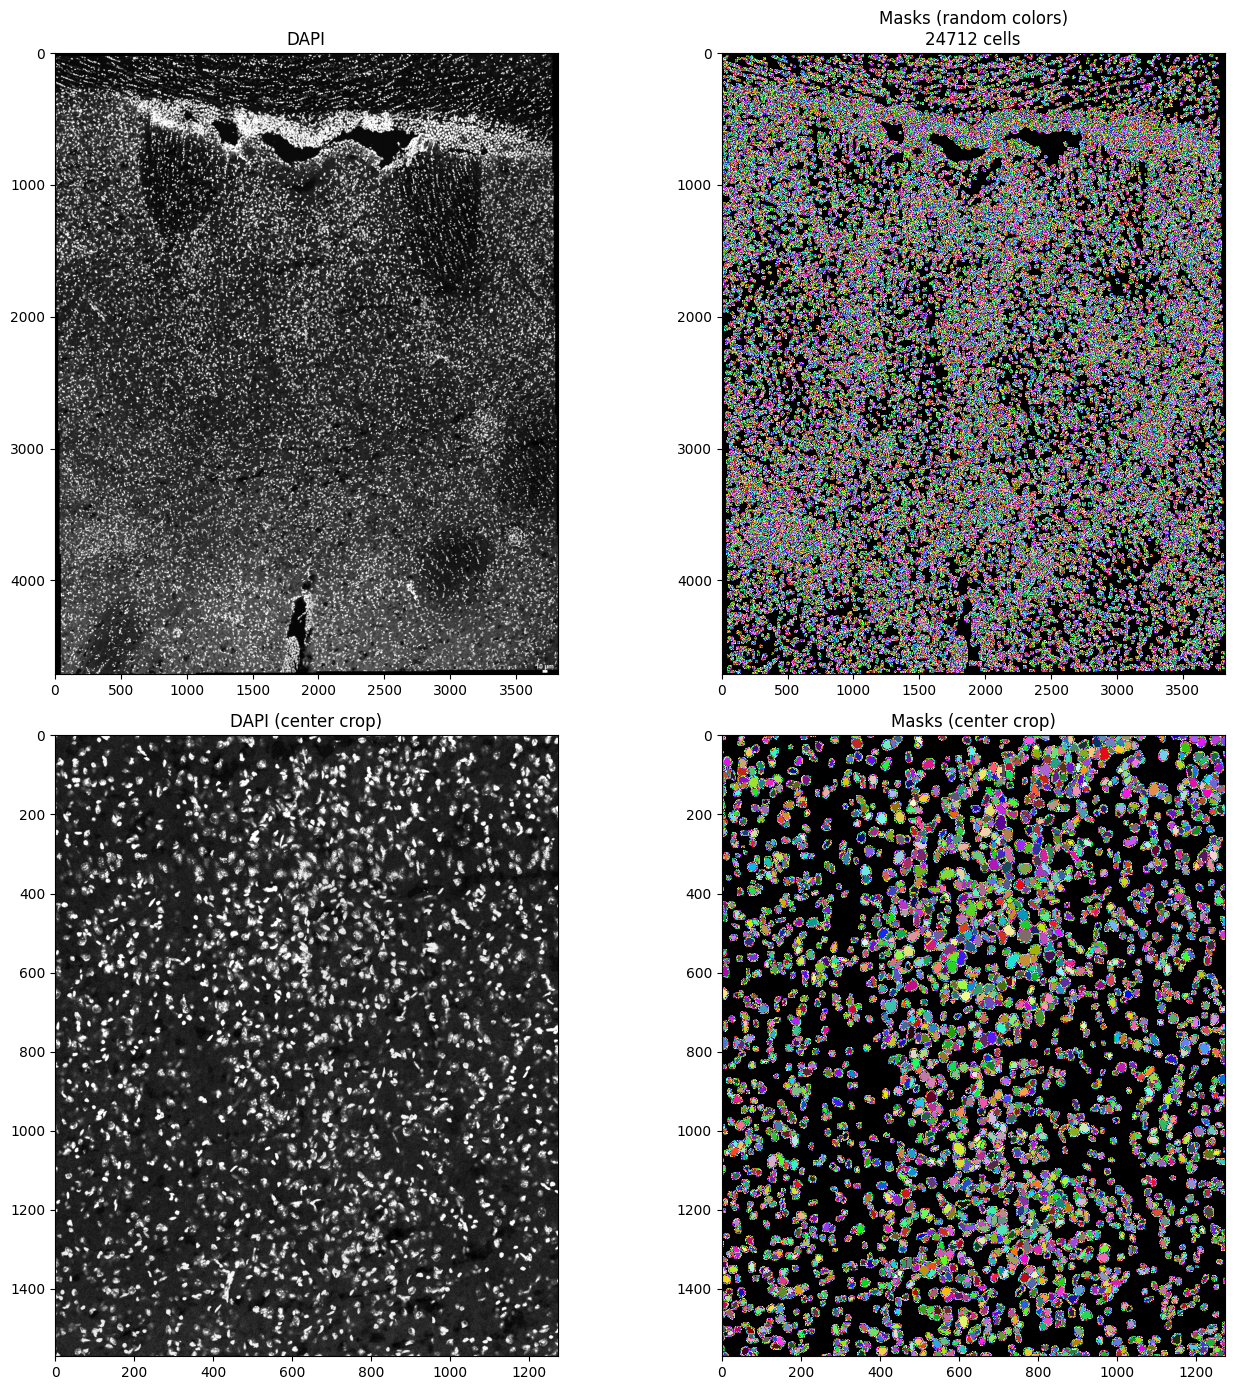


Saved: cellpose_diagnostic.png


In [21]:
from cellpose import models
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load DAPI
dapi_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')
dapi = dapi_rgb[..., 2]  # Blue channel

print(f"DAPI shape: {dapi.shape}")
print(f"DAPI range: {dapi.min()} - {dapi.max()}")

# Cellpose 4.0 API (no model_type in constructor!)
model = models.CellposeModel(gpu=True, model_type='nuclei')

# Run with explicit settings
masks, flows, styles = model.eval(
    dapi,
    diameter=None,  # Auto-detect
    channels=[0, 0],
    flow_threshold=0.4,
    cellprob_threshold=0
)

print(f"\nMask shape: {masks.shape}")
print(f"Mask dtype: {masks.dtype}")
print(f"Unique labels: {len(np.unique(masks))} (including background)")
print(f"Max label: {masks.max()}")

# Check mask properties
labels, counts = np.unique(masks, return_counts=True)
print(f"\nCell size stats (pixels):")
cell_sizes = counts[1:]  # Skip background (label 0)
print(f"  Min: {cell_sizes.min()}")
print(f"  Max: {cell_sizes.max()}")
print(f"  Mean: {cell_sizes.mean():.1f}")
print(f"  Median: {np.median(cell_sizes):.1f}")

# Visualization - check if stripe pattern
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Original
p2, p98 = np.percentile(dapi, (2, 98))
axes[0, 0].imshow(dapi, cmap='gray', vmin=p2, vmax=p98)
axes[0, 0].set_title('DAPI')

# Masks with random colors (avoid stripe artifact)
from matplotlib.colors import ListedColormap
np.random.seed(42)
rand_cmap = ListedColormap(np.random.rand(masks.max() + 1, 3))
rand_cmap.colors[0] = [0, 0, 0]  # Background black

axes[0, 1].imshow(masks, cmap=rand_cmap)
axes[0, 1].set_title(f'Masks (random colors)\n{masks.max()} cells')

# Zoom into a region to check quality
h, w = dapi.shape
crop = slice(h//3, 2*h//3), slice(w//3, 2*w//3)

axes[1, 0].imshow(dapi[crop], cmap='gray', vmin=p2, vmax=p98)
axes[1, 0].set_title('DAPI (center crop)')

axes[1, 1].imshow(masks[crop], cmap=rand_cmap)
axes[1, 1].set_title('Masks (center crop)')

plt.tight_layout()
plt.savefig('cellpose_diagnostic.png', dpi=150)
plt.show()

print("\nSaved: cellpose_diagnostic.png")

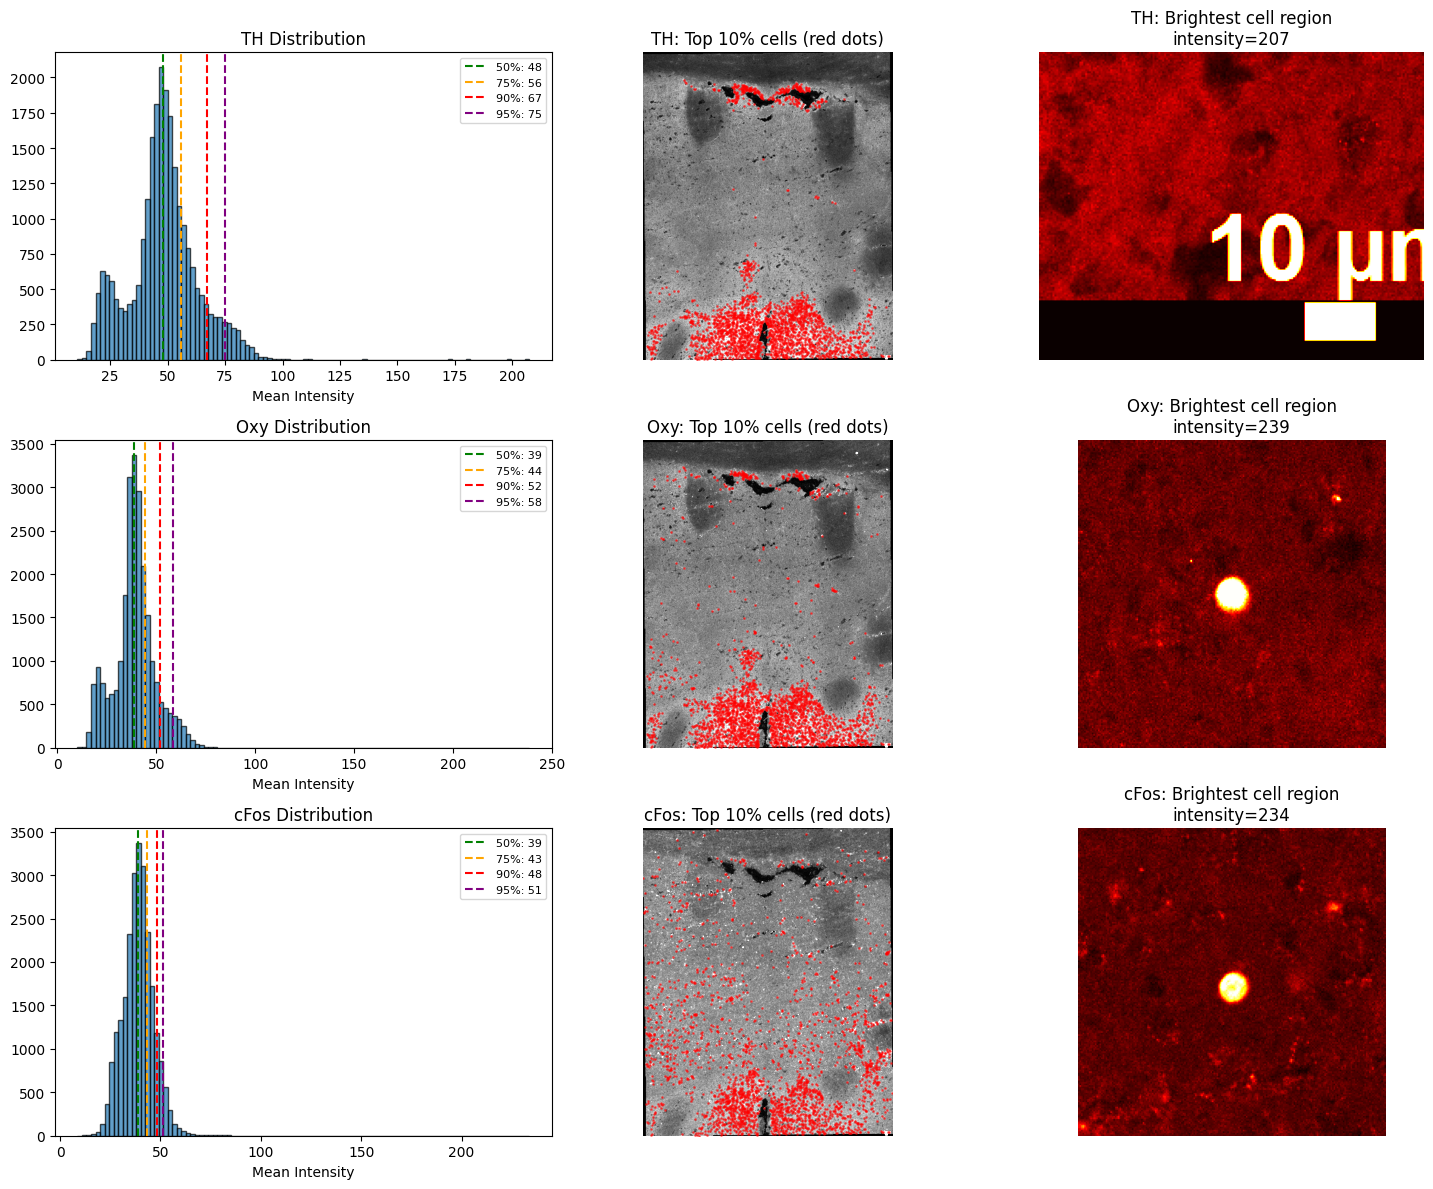


PERCENTILE-BASED CLASSIFICATION:

Top 10% threshold:
  TH > 67:   2472 cells (10.0%)
  Oxy > 52:  2472 cells (10.0%)
  cFos > 48: 2472 cells (10.0%)

Top 5% threshold:
  TH > 75:   1236 cells (5.0%)
  Oxy > 58:  1236 cells (5.0%)
  cFos > 51: 1236 cells (5.0%)

Top 1% threshold:
  TH > 84:   248 cells (1.0%)
  Oxy > 66:  248 cells (1.0%)
  cFos > 58: 248 cells (1.0%)


In [23]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your results
df = pd.read_csv('pvn_cell_analysis.csv')

# Load images for validation
th_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch01_SV.tif')
oxy_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch02_SV.tif')
cfos_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch03_SV.tif')
th = th_rgb[..., 1]
oxy = oxy_rgb[..., 0]
cfos = cfos_rgb[..., 0]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# For each marker: histogram + different threshold options
for row, (name, data, img) in enumerate([
    ('TH', df['TH_mean'], th),
    ('Oxy', df['Oxy_mean'], oxy),
    ('cFos', df['cFos_mean'], cfos)
]):
    # 1. Histogram with percentile lines
    ax = axes[row, 0]
    ax.hist(data, bins=100, alpha=0.7, edgecolor='black')
    
    p50 = np.percentile(data, 50)
    p75 = np.percentile(data, 75)
    p90 = np.percentile(data, 90)
    p95 = np.percentile(data, 95)
    
    ax.axvline(p50, color='green', ls='--', label=f'50%: {p50:.0f}')
    ax.axvline(p75, color='orange', ls='--', label=f'75%: {p75:.0f}')
    ax.axvline(p90, color='red', ls='--', label=f'90%: {p90:.0f}')
    ax.axvline(p95, color='purple', ls='--', label=f'95%: {p95:.0f}')
    ax.legend(fontsize=8)
    ax.set_title(f'{name} Distribution')
    ax.set_xlabel('Mean Intensity')
    
    # 2. Show actual image with top 10% cells marked
    ax = axes[row, 1]
    p2, p98 = np.percentile(img, (2, 98))
    ax.imshow(img[::4, ::4], cmap='gray', vmin=p2, vmax=p98)  # Downsample for speed
    
    # Mark top 10% cells
    top10 = df[data > p90]
    ax.scatter(top10['x']/4, top10['y']/4, c='red', s=1, alpha=0.5)
    ax.set_title(f'{name}: Top 10% cells (red dots)')
    ax.axis('off')
    
    # 3. Zoom on brightest cells
    ax = axes[row, 2]
    brightest = df.nlargest(5, f'{name}_mean')
    if len(brightest) > 0:
        cy, cx = int(brightest.iloc[0]['y']), int(brightest.iloc[0]['x'])
        pad = 100
        crop = img[max(0,cy-pad):cy+pad, max(0,cx-pad):cx+pad]
        ax.imshow(crop, cmap='hot')
        ax.set_title(f'{name}: Brightest cell region\nintensity={brightest.iloc[0][f"{name}_mean"]:.0f}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('threshold_diagnosis.png', dpi=150)
plt.show()

# Print percentile-based counts
print("\n" + "="*60)
print("PERCENTILE-BASED CLASSIFICATION:")
print("="*60)
for pct in [90, 95, 99]:
    th_thresh = np.percentile(df['TH_mean'], pct)
    oxy_thresh = np.percentile(df['Oxy_mean'], pct)
    cfos_thresh = np.percentile(df['cFos_mean'], pct)
    
    n_th = (df['TH_mean'] > th_thresh).sum()
    n_oxy = (df['Oxy_mean'] > oxy_thresh).sum()
    n_cfos = (df['cFos_mean'] > cfos_thresh).sum()
    
    print(f"\nTop {100-pct}% threshold:")
    print(f"  TH > {th_thresh:.0f}:   {n_th} cells ({n_th/len(df)*100:.1f}%)")
    print(f"  Oxy > {oxy_thresh:.0f}:  {n_oxy} cells ({n_oxy/len(df)*100:.1f}%)")
    print(f"  cFos > {cfos_thresh:.0f}: {n_cfos} cells ({n_cfos/len(df)*100:.1f}%)")

In [24]:
# Threshold where the main peak ends (visual inspection from histograms)
th_thresh = 80    # Conservative - catches the clear TH+ cells
oxy_thresh = 70   # Where Oxy background ends
cfos_thresh = 60  # cFos is noisier

df['TH_positive'] = df['TH_mean'] > th_thresh
df['Oxy_positive'] = df['Oxy_mean'] > oxy_thresh
df['cFos_positive'] = df['cFos_mean'] > cfos_thresh

# Recount
print(f"TH+:   {df['TH_positive'].sum()} ({df['TH_positive'].mean()*100:.1f}%)")
print(f"Oxy+:  {df['Oxy_positive'].sum()} ({df['Oxy_positive'].mean()*100:.1f}%)")
print(f"cFos+: {df['cFos_positive'].sum()} ({df['cFos_positive'].mean()*100:.1f}%)")

TH+:   607 (2.5%)
Oxy+:  84 (0.3%)
cFos+: 178 (0.7%)


In [25]:
# Mean + 2*std of the main peak (excludes outliers)
from scipy import stats

def robust_threshold(data, sigma=2):
    # Use median and MAD to ignore the bright tail
    med = np.median(data)
    mad = stats.median_abs_deviation(data)
    return med + sigma * mad * 1.4826  # Convert MAD to std-equivalent

th_thresh = robust_threshold(df['TH_mean'], sigma=3)
oxy_thresh = robust_threshold(df['Oxy_mean'], sigma=3)
cfos_thresh = robust_threshold(df['cFos_mean'], sigma=2.5)  # cFos often needs lower

In [ ]:
# More conservative thresholds
df['TH_positive'] = df['TH_mean'] > np.percentile(df['TH_mean'], 95)  # top 5%
df['Oxy_positive'] = df['Oxy_mean'] > np.percentile(df['Oxy_mean'], 95)
df['cFos_positive'] = df['cFos_mean'] > np.percentile(df['cFos_mean'], 90)  # top 10%

In [ ]:
# from tifffile import imwrite
# import numpy as np

# # After Cellpose segmentation:
# # masks = model.eval(...)[0]

# # Save as 16-bit TIFF (supports up to 65535 unique cells)
# if masks.max() > 65535:
#     print(f"Warning: Too many cells ({masks.max()}), saving as 32-bit")
#     imwrite('masks_cellpose.tif', masks.astype(np.uint32))
# else:
#     imwrite('masks_cellpose.tif', masks.astype(np.uint16))

# print(f"Saved masks: {masks.shape}, {masks.max()} cells")

In [15]:
import os
if os.path.exists('masks_cellpose.tif'):
    print("✓ Masks file found!")
    from skimage import io
    m = io.imread('masks_cellpose.tif')
    print(f"  Shape: {m.shape}, max cell ID: {m.max()}")
else:
    print("❌ Masks file not found!")

❌ Masks file not found!


In [ ]:
# from skimage import io, segmentation
# import matplotlib.pyplot as plt
# import numpy as np

# # Load
# dapi_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')
# dapi = dapi_rgb[..., 2]
# masks = io.imread('masks_cellpose.tif')

# # Find cell boundaries
# boundaries = segmentation.find_boundaries(masks, mode='outer')

# # Show DAPI with cell outlines
# p2, p98 = np.percentile(dapi, (2, 98))

# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Just DAPI
# axes[0].imshow(dapi, cmap='gray', vmin=p2, vmax=p98)
# axes[0].set_title('DAPI (original)', fontsize=14)
# axes[0].axis('off')

# # DAPI + boundaries
# axes[1].imshow(dapi, cmap='gray', vmin=p2, vmax=p98)
# axes[1].imshow(boundaries, cmap='Reds', alpha=0.3)
# axes[1].set_title('DAPI + Cell Outlines', fontsize=14)
# axes[1].axis('off')

# # Zoom in on corner to see individual cells
# crop_size = 500
# dapi_crop = dapi[:crop_size, :crop_size]
# boundaries_crop = boundaries[:crop_size, :crop_size]

# axes[2].imshow(dapi_crop, cmap='gray', vmin=p2, vmax=p98)
# axes[2].imshow(boundaries_crop, cmap='Reds', alpha=0.5)
# axes[2].set_title('Zoom: Individual Cells', fontsize=14)
# axes[2].axis('off')

# plt.tight_layout()
# plt.savefig('cell_outlines.png', dpi=150)
# print("Saved: cell_outlines.png")
# plt.show()

In [ ]:
# from cellpose import models
# import torch

# use_gpu = torch.cuda.is_available()
# model = models.CellposeModel(gpu=use_gpu, model_type='nuclei')

# # Load DAPI
# from skimage import io
# dapi_rgb = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')
# dapi = dapi_rgb[..., 2]

# # Re-segment with SMALLER diameter
# masks_new = model.eval(
#     dapi,
#     diameter=15,  # ← SMALLER (was None = auto-detect)
#     channels=[0, 0],
#     flow_threshold=0.4,
#     cellprob_threshold=0
# )[0]

# print(f"Original segmentation: {masks.max()} cells")
# print(f"New segmentation: {masks_new.max()} cells")

# # If new has MORE cells, it's probably better!

In [ ]:
# from skimage import io, segmentation
# import matplotlib.pyplot as plt

# # Load
# dapi = io.imread('PVN, MD, RE image61_R 91_Merged_ch00_SV.tif')[..., 2]
# masks = io.imread('masks_cellpose.tif')

# # Take random crop to inspect
# import numpy as np
# y, x = 1000, 1000
# crop_dapi = dapi[y:y+300, x:x+300]
# crop_masks = masks[y:y+300, x:x+300]
# crop_boundaries = segmentation.find_boundaries(crop_masks, mode='outer')

# # Show
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# axes[0].imshow(crop_dapi, cmap='gray')
# axes[0].set_title('DAPI')
# axes[1].imshow(crop_masks, cmap='nipy_spectral')
# axes[1].set_title('Segmentation (rainbow)')
# axes[2].imshow(crop_dapi, cmap='gray')
# axes[2].imshow(crop_boundaries, cmap='Reds', alpha=0.7)
# axes[2].set_title('Outlines on DAPI')
# plt.tight_layout()
# plt.savefig('segmentation_quality_check.png', dpi=150)
# plt.show()

# print("Look at segmentation_quality_check.png:")
# print("  - Are cells properly separated?")
# print("  - Or are multiple cells merged together?")